In [2]:
!pip install tensorflow

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten

In [4]:
 def prepare_data(timeseries_data,n_features):
    for i in range(len(timeseries_data)):
        x,y = timeseries_data[:,:-1], timeseries_data[:,-1]
    return np.array(x),np.array(y)

In [4]:
import numpy as np
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Flatten

def prepare_data(timeseries_data, n_features):
    """
    Prepares time series data for LSTM model.

    Args:
        timeseries_data (list): The input time series data.
        n_features (int): The number of features to consider.

    Returns:
        tuple: A tuple containing the input features (x) and target variable (y).
    """

    # Convert the list to a NumPy array for slicing
    timeseries_data = np.array(timeseries_data)

    # Reshape data for LSTM with (samples, timesteps, features)
    # Assuming you want a single feature (the value itself)
    X = []
    y = []
    for i in range(len(timeseries_data) - n_features ):
        X.append(timeseries_data[i:i + n_features])  # Create input sequences
        y.append(timeseries_data[i + n_features])  # Create target values

    # Convert to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

In [5]:
#define input sequence
timeseries_data = [110,125,133,146,158,172,187,196,210]
#Chose the number of time steps
n_features=3
#split into samples
x,y = prepare_data(timeseries_data,n_features)

In [7]:
x

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [8]:
y

array([146, 158, 172, 187, 196, 210])

In [9]:
x.shape

(6, 3)

In [10]:
# Now to reshape the x from [sample,timestamp] to [sample,timestamp,features]
n_features=2
x = x.reshape((x.shape[0],x.shape[1],n_features))

# The error ValueError: cannot reshape array of size 18 into shape (6,3,2) arises
# because you are attempting to reshape the array x into a shape that is incompatible with its original size.
# The original shape of x is (6, 3, 1), meaning it contains 18 elements (6 * 3 * 1 = 18).
# You are trying to reshape it to (6, 3, 2), which would require 36 elements (6 * 3 * 2 = 36).
# Since the number of elements in the original array does not match the number of elements required for the new shape, the reshaping operation fails.
# Essentially, you cannot create more data points out of thin air when reshaping.
# The total number of elements in the array must remain the same before and after reshaping.

ValueError: cannot reshape array of size 18 into shape (6,3,2)

In [11]:
n_features=1
x = x.reshape((x.shape[0],x.shape[1],n_features)) #we are converting from 2 dimension to 3 dimension so that we can give this as input to LSTM

**BUILDING LSTM MODEL**

In [12]:
 #define model
 model = Sequential()
 model.add(LSTM(50,activation='relu',return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
 model.add(LSTM(50,activation='relu'))
 model.add(Dense(1))
 model.compile(optimizer='adam',loss='mse')
 #fit model
 model.fit(x,y,epochs=400,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 32604.5781
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31947.5176
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 31344.7051
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 30816.4160
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 30371.8965
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 29982.7207
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 29631.8887
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 29307.1777
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 28998.7402
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 28700.5840
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 28395.6504
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 28101.9629
Epoch 13/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 27811.8926
Epoch 14/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 27512.7207
Epoch 15/400
1/1 ━━━━━━━━━━━━━━

**Predicting For the next 10 data**

In [15]:
#demonstrate prediction for next 10 days
x_input = np.array([187,196,210])
n_steps = 3
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

  if(len(temp_input)>3):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    #print(x_input)
    x_input = x_input.reshape((1,n_steps, n_features))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.append(yhat[0][0])
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)

[221.94212]
1 day input [196.         210.         221.94212341]
1 day output [[233.76237]]
2 day input [210.         221.94212341 233.76237488]
2 day output [[246.89067]]
3 day input [221.94212 233.76237 246.89067]
3 day output [[259.96597]]
4 day input [233.76237 246.89067 259.96597]
4 day output [[273.63632]]
5 day input [246.89067 259.96597 273.63632]
5 day output [[288.42493]]
6 day input [259.96597 273.63632 288.42493]
6 day output [[303.67767]]
7 day input [273.63632 288.42493 303.67767]
7 day output [[319.75327]]
8 day input [288.42493 303.67767 319.75327]
8 day output [[336.78397]]
9 day input [303.67767 319.75327 336.78397]
9 day output [[354.45386]]
[221.94212, 233.76237, 246.89067, 259.96597, 273.63632, 288.42493, 303.67767, 319.75327, 336.78397, 354.45386]


In [13]:
#demonstrate prediction for next 10 days
x_input = np.array([187,196,210])
n_steps = 3
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

  if(len(temp_input)>3):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(x_input))
    #print(x_input)
    x_input = x_input.reshape((1,n_steps, n_features))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.append(yhat[0][0])
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)

[223.54842]


IndexError: Replacement index 1 out of range for positional args tuple

In [16]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [17]:
len(timeseries_data)

9

In [18]:
lst_output

[221.94212,
 233.76237,
 246.89067,
 259.96597,
 273.63632,
 288.42493,
 303.67767,
 319.75327,
 336.78397,
 354.45386]

In [21]:
x_input

array([[[303.67767],
        [319.75327],
        [336.78397]]], dtype=float32)

**Visualizaing The Output**

In [22]:
import matplotlib.pyplot as plt


In [24]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

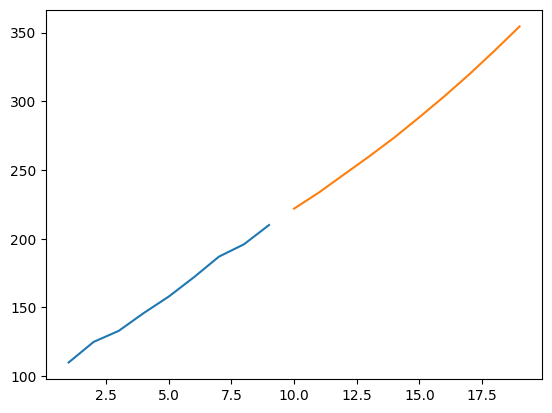

In [25]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)